In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# 0. Data Loading / Displaying

In [26]:
# Data Load
df_loan = pd.read_csv("../data/raw/loan_applications.csv")
df_transaction = pd.read_csv("../data/raw/transactions.csv")

# Display
display(df_loan.head(), df_loan.shape[0])
display(df_transaction.head(), df_transaction.shape[0])

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


50000

,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,ba998721-a612-4e0a-8354-46d001e9c39c,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,c4fce988-34c5-48db-8686-bfad0b3bc0b5,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,f9b8ca30-00e5-4322-8cff-eac0554cf2da,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


50000

In [5]:
# Display basic information about loan and transaction datasets
print("Loan dataset info:")
df_loan.info()
print("\nTransaction dataset info:")
df_transaction.info()

Loan dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  

# 1. What kind of data are we dealing with?

We are working with two datasets:
- `loan_applications.csv`: Each row is a **loan application**, with features such as loan type, amount, applicant income, and risk indicators.
- `transaction.csv`: Each row is a **financial transaction**, associated with customers, with transaction type, amount, and a `fraud_flag`.

This structure suggests a 1-to-many relation: one applicant may perform multiple transactions.


# 2. How imbalanced is the fraud target?

In [19]:
df_transaction['fraud_flag'].value_counts(normalize=True)

fraud_flag
0    0.98996
1    0.01004
Name: proportion, dtype: float64

Fraudulent transactions make up only ~1% of the dataset, confirming a strong class imbalance. This will affect model training and requires specific treatment (resampling, class weights, etc.).

# 3. Are frauds associated with higher amounts?

In [20]:
df_transaction[['transaction_amount', 'fraud_flag']].groupby('fraud_flag').describe()

transaction_amount                                                \
                        count         mean          std    min          25%   
fraud_flag                                                                    
0                     49498.0  4972.701927  4986.079729  100.0  1400.000000   
1                       502.0  8256.805723  9962.583597  100.0  1995.004388   

                                                     
                    50%           75%           max  
fraud_flag                                           
0           3400.000000   6900.000000  60700.000000  
1           4874.115125  10923.619166  76531.610223

The average amount for frauds is 8,256 vs 4,972 for non-fraud, suggesting that high-value transactions are more likely to be fraudulent.

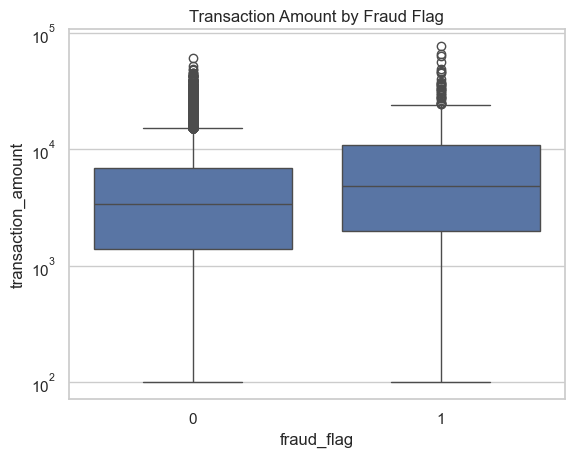

In [21]:
sns.boxplot(x='fraud_flag', y='transaction_amount', data=df_transaction)
plt.title("Transaction Amount by Fraud Flag")
plt.yscale("log")

# 4. Are some transaction types riskier?

Text(0.5, 1.0, 'Fraud Count per Transaction Type')

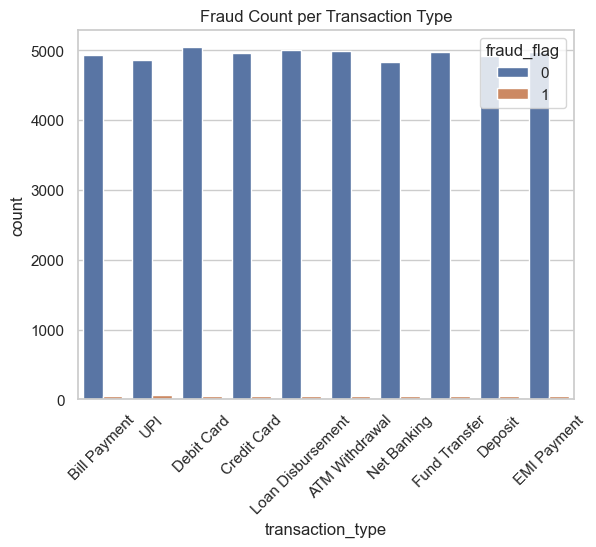

In [22]:
sns.countplot(x='transaction_type', hue='fraud_flag', data=df_transaction)
plt.xticks(rotation=45)
plt.title("Fraud Count per Transaction Type")

# 5. What are the most common loan types?

In [23]:
df_loan['loan_type'].value_counts()

loan_type
Home Loan         10056
Education Loan    10022
Personal Loan     10020
Business Loan      9961
Car Loan           9941
Name: count, dtype: int64

All five types (Home, Education, Personal, etc.) are roughly balanced (~10k rows each), which is great for comparisons.

# 6. Are there missing values?

In [25]:
df_loan.isnull().sum()

application_id                   0
customer_id                      0
application_date                 0
loan_type                        0
loan_amount_requested            0
loan_tenure_months               0
interest_rate_offered            0
purpose_of_loan                  0
employment_status                0
monthly_income                   0
cibil_score                      0
existing_emis_monthly            0
debt_to_income_ratio             0
property_ownership_status        0
residential_address              0
applicant_age                    0
gender                           0
number_of_dependents             0
loan_status                      0
fraud_flag                       0
fraud_type                   48974
dtype: int64

There are no missing values in the features (only in fraud_type, which might be a subcategory of fraud). This allows us to proceed without imputation.

# 7. Which transaction types are the most fraud-prone, and how frequent are they?

In [27]:
# Fraud ratio per transaction type
fraud_by_type = df_transaction.groupby('transaction_type')['fraud_flag'].mean().sort_values(ascending=False)

# Number of transactions per type
count_by_type = df_transaction['transaction_type'].value_counts()

# Combine into a single DataFrame
type_stats = pd.DataFrame({
    'fraud_ratio': fraud_by_type,
    'transaction_count': count_by_type
}).sort_values('fraud_ratio', ascending=False)

display(type_stats)

,fraud_ratio,transaction_count
transaction_type,,
UPI,0.012198,4919
EMI Payment,0.011131,5031
Net Banking,0.010223,4891
Loan Disbursement,0.010087,5056
Deposit,0.009867,4966
Fund Transfer,0.009751,5025
Credit Card,0.009587,5007
ATM Withdrawal,0.009520,5042
Bill Payment,0.009246,4975


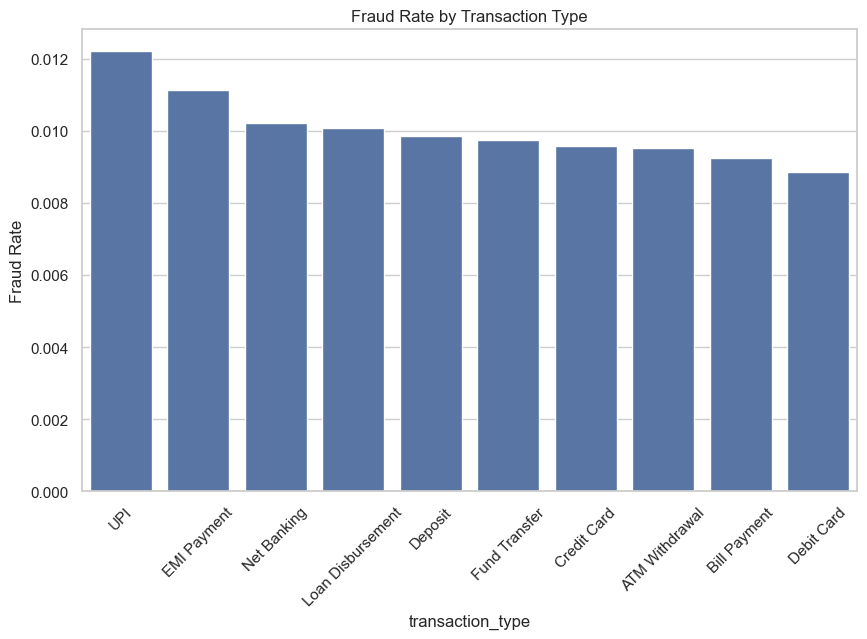

In [28]:
# Visual plot
plt.figure(figsize=(10, 6))
sns.barplot(x=type_stats.index, y=type_stats['fraud_ratio'])
plt.xticks(rotation=45)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Transaction Type")
plt.show()

# 8. Customer analysis

## 8.1 Risky customers

In [29]:
# Fraud count and ratio per customer
customer_fraud_stats = df_transaction.groupby('customer_id')['fraud_flag'].agg(['count', 'sum'])
customer_fraud_stats['fraud_ratio'] = customer_fraud_stats['sum'] / customer_fraud_stats['count']
customer_fraud_stats = customer_fraud_stats.sort_values('fraud_ratio', ascending=False)

# Top 10 risky customers (with at least 5 transactions)
top_risky_customers = customer_fraud_stats[customer_fraud_stats['count'] >= 5].head(10)
display(top_risky_customers)

,count,sum,fraud_ratio
customer_id,,,
CUST101733,5,5,1.000000
CUST106807,5,5,1.000000
CUST118548,6,5,0.833333
CUST110185,6,5,0.833333
CUST117942,5,4,0.800000
CUST107419,5,4,0.800000
CUST101370,5,4,0.800000
CUST100127,5,4,0.800000
CUST108133,7,5,0.714286


Some customers have a very high fraud ratio, especially those with multiple transactions.
This may help us flag risky users and engineer user-level features (e.g., average fraud rate).

## 8.2 loan ↔ transaction

In [30]:
# Merge on customer_id
merged_df = pd.merge(df_transaction, df_loan, on='customer_id', how='left')

# Preview merged data
display(merged_df.head())


,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag_y,fraud_type
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,...,2100.0,5.34,Owned,"H.No. 188, Swaminathan, Pudukkottai 919265, Ko...",52.0,Female,1.0,Approved,0.0,NaN
1,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,...,4700.0,11.96,Jointly Owned,"H.No. 188, Swaminathan, Pudukkottai 919265, Ko...",52.0,Female,1.0,Approved,0.0,NaN
2,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,...,900.0,2.29,Owned,"H.No. 188, Swaminathan, Pudukkottai 919265, Ko...",52.0,Female,1.0,Approved,0.0,NaN
3,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,...,800.0,2.04,Rented,"H.No. 188, Swaminathan, Pudukkottai 919265, Ko...",52.0,Female,1.0,Approved,0.0,NaN
4,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,...,4300.0,10.94,Jointly Owned,"H.No. 188, Swaminathan, Pudukkottai 919265, Ko...",52.0,Female,1.0,Declined,0.0,NaN


In [32]:
# Drop duplicate or redundant fraud_flag from loan
merged_df = merged_df.drop(columns=['fraud_flag_y'])
merged_df = merged_df.rename(columns={'fraud_flag_x': 'fraud_flag'})


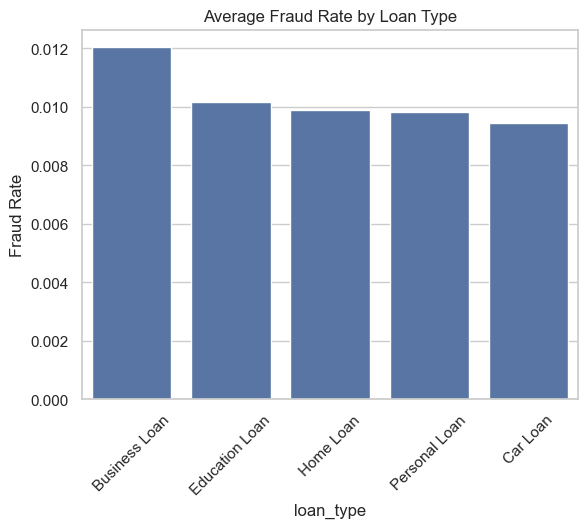

In [33]:
fraud_by_loan_type = merged_df.groupby('loan_type')['fraud_flag'].mean().sort_values(ascending=False)

sns.barplot(x=fraud_by_loan_type.index, y=fraud_by_loan_type.values)
plt.title("Average Fraud Rate by Loan Type")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()